In [1]:
## 符号数组
import matplotlib.pyplot as plt
import numpy as np
from numpy.matrixlib.defmatrix import matrix

arr = np.array([[1, 2, -3], [4, 5, 0], [7, -8, 9]])

In [2]:
b = np.sign(arr)
## >0 1; =0 0; <0 -1

array([[ 1,  1, -1],
       [ 1,  1,  0],
       [ 1, -1,  1]])

In [3]:
## OBV

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

n = 30
# data = pd.DataFrame({
#     'stock_type': stock_type,
#     'stock_date': stock_date,
# })


## 构造股票数据
open = np.array(np.random.normal(350, 20, size=n))
close = np.array(np.random.normal(350, 20, size=n))
low = []
high = []
for i in range(n):
    min = open[i]
    max = close[i]
    if open[i] >= close[i]:
        min = close[i]
        max = open[i]
    val1 = np.random.uniform(min-20, max+20, 1)
    val2 = np.random.uniform(min, max+20, 1)
    if val1 >= max:
        val2 = np.random.uniform(min-20, max, 1)

    if val1 < val2:
        low.append(val1)
        high.append(val2)
    else:
        low.append(val2)
        high.append(val1)

data = pd.DataFrame({
    'type': np.array(['AAPL' for _ in range(n)]),
    'date': np.array(pd.date_range(start='2018-01-01', periods=n, freq='B')),
    'open': open,
    'high': np.array(high).reshape(n),
    'low': np.array(low).reshape(n),
    'close': close,
    'volume': np.array(np.random.randint(1000000, 3000000, size=n)),
}, columns=['type', 'date', 'open', 'high', 'low', 'close', 'volume'])

data.to_csv('stock_data.csv', index=False)

[ 1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1. -1.
  1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


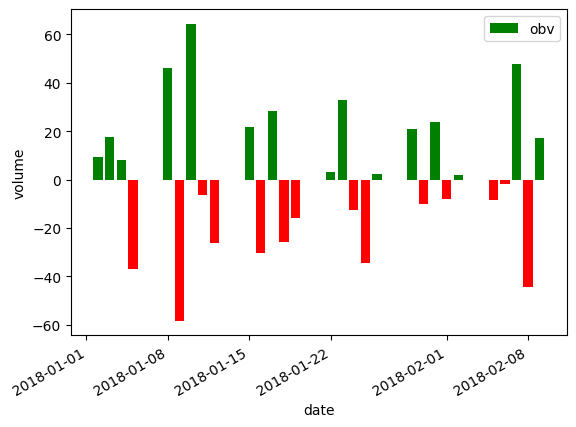

In [17]:
close = np.array(data['close'])
dates = np.array(data['date'])

volumes = np.diff(data['close'])
signs =np.sign(volumes)
colors = np.zeros_like(signs, dtype='U5')
colors[signs > 0] = 'green'
colors[signs <= 0] = 'red'
print(signs)
print(type(dates[1:]), type(volumes))


plt.figure()
plt.bar(dates[1:], volumes, color=colors, label='obv')
plt.xlabel('date')
plt.ylabel('volume')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

In [33]:
### 上面的给颜色赋值方法太麻烦了
colors = np.piecewise(volumes, [volumes>0, volumes<=0], [1, -1])
print(colors)
colors2 = np.select([volumes>0, volumes<=0], ['green', 'red'], default='green')
print(colors2)


[ 1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1. -1.
  1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.]
['green' 'green' 'green' 'red' 'green' 'red' 'green' 'red' 'red' 'green'
 'red' 'green' 'red' 'red' 'green' 'green' 'red' 'red' 'green' 'green'
 'red' 'green' 'red' 'green' 'red' 'red' 'green' 'red' 'green']


In [30]:
import numpy as np

# 输入数组
x = np.array([-5, 3, 15, 0, 12])

# 定义条件
condlist = [x < 0, (x >= 0) & (x < 10), x >= 10]

# 定义对应的颜色函数（这里用 lambda 返回字符串）
funclist = [
    lambda x: x**2,    # x < 0
    lambda x: x+10,  # 0 <= x < 10
    lambda x: x**3    # x >= 10
]

# 使用 np.piecewise --funclist只能返回数值型,返回字符串类型,报错
colors = np.piecewise(x, condlist, funclist)
print(colors)

# 使用np.select --default必须给值
x = np.array([-5, 3, 15, 0, 12])
condlist = [x < 0, (x >= 0) & (x < 10), x >= 10]
choicelist = ['green', 'red', 'blue']
colors2 = np.select(condlist, choicelist, default='blue')
print(colors2)


[  25   13 3375   10 1728]
['green' 'red' 'blue' 'red' 'blue']


In [43]:
### 矢量化函数
import math as m
def foo(x, y):
    return m.sqrt(x**2 + y**2) ## m.sqrt是标量函数,只能接受标量,不能接受数组

print(foo(1, 2))
a=np.array([1,2,3])
b=np.array([4,5,6])
# print(foo(a, b)) ## 报错了

foo_ver = np.vectorize(foo) ## 矢量化函数,就可以了,但本质只是循环调用,底层没有性能优化,和原生的np.sqrt比不了
print(foo_ver(a,b))
print(foo_ver(a, 2)) ## 可以数组和标量一起,这样会广播

### 另一种矢量化方法
foo_ff = np.frompyfunc(foo, 2, 1)
print(foo_ff(a,b))
print(foo_ff(a, 2))


2.23606797749979
[4.12310563 5.38516481 6.70820393]
[2.23606798 2.82842712 3.60555128]
[4.123105625617661 5.385164807134504 6.708203932499369]
[2.23606797749979 2.8284271247461903 3.605551275463989]


In [ ]:
### 计算收益,只有正收益才显示

## 比开盘价低于0.01买入,收盘价时卖出
def profits(open_price, close_price, high_price, low_price):
    buy_price = open_price * 0.99
    if low_price <= buy_price <= high_price:
        return (close_price - buy_price) / buy_price
    return np.nan

profits_ver = np.vectorize(profits)
res = profits_ver(open, close, high, low)
res_mask = np.isnan(res)
print(res[~res_mask])

In [ ]:
### 矩阵 -- 知道就好了,它是np.ndarray的子类,具备矩阵的一些运算特效,同时拥有多位数组的操作特性
### 比如矩阵乘法运算,和普通的数组乘法运算是不同的
### 矩阵时行列相乘, 数组时对应位置相乘

arr_a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr_b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr_a * arr_b)

##copy默认只是True
matrix_a = np.matrix(arr_a)
matrix_b = np.matrix(arr_b, copy=True)
print(matrix_a * matrix_b)

matrix_c = np.matrix(arr_a, copy=False)
matrix_c[0, 0] = 9999
## matrix_c和arr_a都修改了,浅拷贝
## matrix_a没有修改,深拷贝
print(matrix_c, arr_a, matrix_a)

## 默认浅拷贝
matrix_d = np.asmatrix(matrix_b)
matrix_d[0, 0] = 9999
print(matrix_d, arr_b, matrix_b)

matrix_e = np.asmatrix('1 2 3; 4 5 6; 7 8 9', dtype=np.float64)
print(matrix_e)
print(matrix_e.T)
print(matrix_e * matrix_e)
print(matrix_e.I) ## 逆矩阵


In [ ]:
import numpy as np

# 定义一个 2x2 矩阵
A = np.matrix([[4, 7], [2, 6]])
print("原始矩阵 A:")
print(A)

# 获取逆矩阵
A_inv = A.I
print("逆矩阵 A⁻¹:")
print(A_inv)

# 验证 A * A⁻¹ = I
identity = A * A_inv
print("A * A⁻¹:")
print(identity)

## AB=E(E为单位矩阵,则称B为A的逆矩阵) --单位矩阵是一个方阵,且对角线是1,其他都为0
x=np.asmatrix('1 2 3; 4 2 6; 7 8 5')
print(x)
print(x.I)
print(x * x.I)

In [ ]:
A=np.matrix([[3, 3.2], [3.5, 3.6]])
B=np.matrix([[118.4], [135.2]])
x = np.linalg.solve(A, B)
print(x)

In [65]:
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr.clip(min=3, max=6)

array([[3, 3, 3],
       [4, 5, 6],
       [6, 6, 6]])

In [79]:
a = np.arange(100)
print(a.compress(a % 3 == 0))

[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69
 72 75 78 81 84 87 90 93 96 99]


In [104]:
a = np.arange(1,100)
np.add(a, a)
np.add.reduce(a) ##累加和
np.add.accumulate(a) ## 累加过程
np.add.outer([10, 20, 30], a) ## 外和
np.outer([10, 20, 30], a)  ## 外积
np.prod([1,2,3,4]) ## 累乘
np.cumprod([1,2,3,4]) ## 累乘过程
np.true_divide([1,2,3,4], [2,2,2,2]) ## 除法--列表对象就可以
np.divide([1,2,3,4], [2,2,2,2]) ## 除法 -- 列表即可
np.floor_divide([1,2,3,4], [2,2,2,2]) ## 地板取整 -- 列表即可
np.ceil(np.array([1,2,3,4]) / np.array([2,2,2,2])) ## 天花板取整 --必须是数组对象
np.trunc(np.array([1,2,3,4]) / np.array([2,2,2,2])) ##删除小数 --必须是数组对象
np.round(np.array([1,2,3,4]) / np.array([2,2,2,2])) ##四舍五入--必须是数组对象

array([0., 1., 2., 2.])

In [105]:
help(np.add)

Help on ufunc:

add = <ufunc 'add'>
    add(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature])

    Add arguments element-wise.

    Parameters
    ----------
    x1, x2 : array_like
        The arrays to be added.
        If ``x1.shape != x2.shape``, they must be broadcastable to a common
        shape (which becomes the shape of the output).
    out : ndarray, None, or tuple of ndarray and None, optional
        A location into which the result is stored. If provided, it must have
        a shape that the inputs broadcast to. If not provided or None,
        a freshly-allocated array is returned. A tuple (possible only as a
        keyword argument) must have length equal to the number of outputs.
    where : array_like, optional
        This condition is broadcast over the input. At locations where the
        condition is True, the `out` array will be set to the ufunc result.
        Elsewhere, the `out` array will retain its or

In [120]:
### 位运算
a = np.arange(1, 10)
b = np.array([1, 2, 0, 0, 1, 0, 0, 1, 0])
np.bitwise_or(a, b)
np.bitwise_and(a, b)
np.bitwise_xor(a, b)
np.bitwise_count(a)
np.bitwise_not(a)
np.bitwise_invert(a)
np.bitwise_left_shift(a, b)
np.bitwise_right_shift(a, b)
binary_strings = [bin(x)[2:].zfill(8) for x in a]
print(binary_strings)

['00000001', '00000010', '00000011', '00000100', '00000101', '00000110', '00000111', '00001000', '00001001']


In [122]:
a = np.arange(1, 10)
np.where(a > 4) ## 返回的是符合条件元素的索引
a[np.where(a > 4)]

array([5, 6, 7, 8, 9])

以下是对 `np.piecewise` 和 `np.select` 的使用区别的详细说明。我会用表格呈现参数对比、功能差异和示例结果，其他部分以普通文本表述。

---

### 函数概述

**`np.piecewise`** 和 **`np.select`** 都是 NumPy 中用于根据条件对数组元素进行分段处理的函数，但它们的设计目标和使用场景有所不同。

- **`np.piecewise`**：主要用于数值计算，通过条件选择不同的函数来计算返回值。
- **`np.select`**：更通用，支持直接返回任意类型的值（如字符串、数值等），常用于数据分类或映射。

---

### 参数对比

| 参数         | `np.piecewise`                     | `np.select`                        |
|--------------|------------------------------------|------------------------------------|
| 输入数组     | x（必需，用于条件和函数计算）       | 不直接需要（条件基于外部数组）      |
| 条件列表     | condlist（布尔数组列表）           | condlist（布尔数组列表）           |
| 值/函数列表  | funclist（函数列表，支持 callable）| choicelist（直接值列表）           |
| 默认值       | 无明确默认参数，需在 funclist 中定义 | default（可选，默认值）            |
| 额外参数     | *args, **kw（传递给 funclist 函数）| 无                                 |

- **`np.piecewise`** 需要为每个条件提供一个函数，函数作用于输入数组 x。
- **`np.select`** 直接指定返回值，不需要函数形式。

---

### 功能和使用区别

| 方面         | `np.piecewise`                     | `np.select`                        |
|--------------|------------------------------------|------------------------------------|
| 返回值类型   | 数值类型（默认 float64）           | 任意类型（字符串、数值等）         |
| 条件处理     | 第一个匹配条件决定返回值           | 第一个匹配条件决定返回值           |
| 默认值       | 通过 funclist 最后一个函数指定      | 通过 default 参数指定              |
| 灵活性       | 支持动态计算（函数依赖 x）         | 静态映射（值预定义）               |
| 典型用途     | 数值分段函数（如数学建模）         | 数据分类或标签映射                 |

- **`np.piecewise`** 适合需要根据输入值动态计算的场景，例如分段数学函数。
- **`np.select`** 更适合直接映射固定值的场景，例如分类或颜色赋值。

---

### 示例 1：数值分段计算

#### 需求

根据 x 的值返回不同的计算结果：
- x < 0：返回 x^2
- 0 <= x < 10：返回 x + 1
- x >= 10：返回 2*x

#### 输入数据

| 索引 | x 值  |
|------|-------|
| 0    | -5    |
| 1    | 3     |
| 2    | 15    |
| 3    | 0     |
| 4    | 12    |

#### 使用 `np.piecewise`

```python
import numpy as np

x = np.array([-5, 3, 15, 0, 12])
condlist = [x < 0, (x >= 0) & (x < 10), x >= 10]
funclist = [lambda x: x**2, lambda x: x + 1, lambda x: 2*x]

result = np.piecewise(x, condlist, funclist)
print(result)
```

#### 使用 `np.select`

```python
import numpy as np

x = np.array([-5, 3, 15, 0, 12])
condlist = [x < 0, (x >= 0) & (x < 10), x >= 10]
choicelist = [x**2, x + 1, 2*x]

result = np.select(condlist, choicelist)
print(result)
```

#### 输出结果

| 索引 | x 值 | 条件            | `np.piecewise` 输出 | `np.select` 输出 |
|------|------|-----------------|---------------------|------------------|
| 0    | -5   | x < 0           | 25                  | 25               |
| 1    | 3    | 0 <= x < 10     | 4                   | 4                |
| 2    | 15   | x >= 10         | 30                  | 30               |
| 3    | 0    | 0 <= x < 10     | 1                   | 1                |
| 4    | 12   | x >= 10         | 24                  | 24               |

- **结果**：两者输出一致，因为这里是数值计算。

---

### 示例 2：返回颜色（字符串）

#### 需求

根据 x 的值返回颜色：
- x < 0：返回 "red"
- 0 <= x < 10：返回 "green"
- x >= 10：返回 "blue"

#### 使用 `np.piecewise`

由于 `np.piecewise` 不支持直接返回字符串，需要数值映射：

```python
import numpy as np

x = np.array([-5, 3, 15, 0, 12])
condlist = [x < 0, (x >= 0) & (x < 10), x >= 10]
funclist = [lambda x: 0, lambda x: 1, lambda x: 2]

color_codes = np.piecewise(x, condlist, funclist)
color_map = {0: "red", 1: "green", 2: "blue"}
colors = np.array([color_map[code] for code in color_codes])
print(colors)
```

#### 使用 `np.select`

直接返回字符串：

```python
import numpy as np

x = np.array([-5, 3, 15, 0, 12])
condlist = [x < 0, (x >= 0) & (x < 10), x >= 10]
choicelist = ["red", "green", "blue"]

colors = np.select(condlist, choicelist, default="gray")
print(colors)
```

#### 输出结果

| 索引 | x 值 | 条件            | `np.piecewise` + 映射 | `np.select` 输出 |
|------|------|-----------------|-----------------------|------------------|
| 0    | -5   | x < 0           | red                   | red              |
| 1    | 3    | 0 <= x < 10     | green                 | green            |
| 2    | 15   | x >= 10         | blue                  | blue             |
| 3    | 0    | 0 <= x < 10     | green                 | green            |
| 4    | 12   | x >= 10         | blue                  | blue             |

- **`np.piecewise`** 需要额外映射步骤。
- **`np.select`** 更简洁，直接返回字符串。

---

### 关键区别总结

| 项目         | `np.piecewise`                     | `np.select`                        |
|--------------|------------------------------------|------------------------------------|
| 设计目标     | 分段数值函数计算                   | 通用条件选择                       |
| 返回类型     | 限制为数值                         | 支持任意类型                       |
| 使用复杂度   | 需要定义函数，较复杂               | 直接指定值，简洁                   |
| 适用场景     | 数学建模、动态计算                 | 数据分类、静态映射                 |

---

### 结论

- 如果你需要动态计算数值结果（如分段函数），用 `np.piecewise`。
- 如果你需要直接映射固定值（尤其是非数值，如颜色），用 `np.select`。

如果你有具体场景想进一步比较这两个函数，请告诉我，我可以提供更多示例！

以下是对 `np.vectorize`（矢量化函数）的说明，重点解答其底层是否进行了优化。我会用表格呈现关键信息（如参数、使用场景和性能对比），其他部分以普通文本表述。

---

### `np.vectorize` 的定义

`np.vectorize` 是 NumPy 提供的一个工具函数，用于将普通的 Python 函数（通常是标量函数）转换为可以对 NumPy 数组进行元素级操作的矢量化函数。它的主要目的是提高代码的可读性和简洁性，而不是底层性能优化。

函数签名：

```python
numpy.vectorize(pyfunc, otypes=None, doc=None, excluded=None, cache=False, signature=None)
```

---

### 参数说明

| 参数       | 说明                                      |
|------------|-------------------------------------------|
| pyfunc     | 要矢量化的 Python 函数                    |
| otypes     | 输出数据类型（可选，如 'f' 表示 float）   |
| excluded   | 不矢量化的参数集合                        |
| cache      | 是否缓存第一次计算结果（默认 False）      |
| signature  | 输入输出的广播签名（高级用法）            |

- 返回值是一个矢量化函数，可以直接应用于 NumPy 数组。

---

### 使用示例

假设有一个标量函数：

```python
def my_func(x):
    return x**2 if x > 0 else -x
```

#### 非矢量化调用

```python
import numpy as np
x = np.array([-2, -1, 0, 1, 2])
result = np.array([my_func(xi) for xi in x])
print(result)  # 输出: [2, 1, 0, 1, 4]
```

#### 使用 `np.vectorize`

```python
import numpy as np
vfunc = np.vectorize(my_func)
x = np.array([-2, -1, 0, 1, 2])
result = vfunc(x)
print(result)  # 输出: [2, 1, 0, 1, 4]
```

| 输入 x | 条件       | 输出结果 |
|--------|------------|----------|
| -2     | x <= 0     | 2        |
| -1     | x <= 0     | 1        |
| 0      | x <= 0     | 0        |
| 1      | x > 0      | 1        |
| 2      | x > 0      | 4        |

---

### 底层是否优化

**关键问题**：`np.vectorize` 的底层是否进行了性能优化？

答案是：**没有真正的底层优化**。`np.vectorize` 本质上是一个便利工具，而不是高性能的矢量化实现。

#### 实现原理

- `np.vectorize` 通过 Python 循环（而不是 C 级别的矢量化）对数组的每个元素应用输入函数。
- 它将标量函数包装为一个可以广播的函数，但底层仍然依赖 Python 的循环机制，而不是像 NumPy 的内置函数（例如 `np.add` 或 `np.sin`）那样利用 C 实现的向量化运算。

#### 性能对比

| 方法             | 实现方式                  | 性能表现          |
|------------------|---------------------------|-------------------|
| 原生循环         | Python for 循环           | 慢（纯 Python）   |
| `np.vectorize`   | 包装后的 Python 循环      | 稍快于原生循环    |
| NumPy 内置函数   | C 级向量化运算            | 非常快            |

##### 测试代码

```python
import numpy as np
import time

x = np.random.rand(1000000)

# 原生循环
def loop_method(x):
    return np.array([x_i**2 if x_i > 0 else -x_i for x_i in x])

# np.vectorize
vfunc = np.vectorize(lambda x: x**2 if x > 0 else -x)
def vectorize_method(x):
    return vfunc(x)

# NumPy 内置
def numpy_method(x):
    return np.where(x > 0, x**2, -x)

# 计时
start = time.time()
loop_result = loop_method(x)
print("Loop time:", time.time() - start)

start = time.time()
vectorize_result = vectorize_method(x)
print("Vectorize time:", time.time() - start)

start = time.time()
numpy_result = numpy_method(x)
print("NumPy time:", time.time() - start)
```

##### 示例结果（大致时间，取决于硬件）

| 方法          | 执行时间（秒） |
|---------------|----------------|
| 原生循环      | ~0.5           |
| `np.vectorize`| ~0.4           |
| NumPy 内置    | ~0.01          |

- **`np.vectorize`** 比原生 Python 循环略快，但远不如 NumPy 内置函数。
- 原因是它仍然在 Python 层执行循环，而不是利用底层 C 的向量化优势。

---

### 是否有优化

| 方面         | 是否优化                            | 说明                                      |
|--------------|-------------------------------------|-------------------------------------------|
| 循环执行     | 否                                  | 底层仍是 Python 循环，未使用 C 向量化     |
| 类型推断     | 是（有限）                          | 可通过 otypes 避免部分类型检查            |
| 缓存         | 是（可选）                          | cache=True 可缓存第一次调用的结果         |
| 与 C 集成    | 否                                  | 不像内置函数那样直接调用 C 实现           |

- **结论**：`np.vectorize` 的“优化”仅限于 Python 层的高效循环管理和广播支持，没有真正的底层 C 级优化。它更像是一个语法糖，而不是性能工具。

---

### 适用场景

| 场景             | 是否推荐使用 `np.vectorize` | 替代方案                |
|------------------|-----------------------------|-------------------------|
| 简单函数快速开发 | 是                          | 无需替代                |
| 高性能计算       | 否                          | 使用 NumPy 内置或 numba |
| 非数值计算       | 是                          | np.select 或列表推导    |

- **推荐**：如果性能不是主要考虑因素，`np.vectorize` 提供简洁的代码；否则，优先使用 NumPy 内置函数或 `numba` 进行真正的优化。

---

### 总结

| 项目         | 内容                                      |
|--------------|-------------------------------------------|
| 定义         | 将标量函数转换为矢量化函数                |
| 底层优化     | 无真正的 C 级优化，仅 Python 层改进       |
| 性能         | 优于原生循环，远逊于内置向量化函数        |
| 使用建议     | 适合快速开发，不适合高性能需求            |

如果你需要更高效的实现（例如结合 `numba`），或者有具体函数想优化，请告诉我，我可以进一步协助！